In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('../input/property-prices-bangalore/bhp.csv')

In [3]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250


In [4]:
Q1 = np.percentile(df.price_per_sqft, .1,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df.price_per_sqft, .999,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

1178.0

Outlier detection and removal is a very important step of feature engineering. If outlier are not catered correctly then it may affect our classifier's accuracy drastically. So it should be done in the feature engineering pipeline. In order to do this, the basic and the very first step is to check and visualize the datasets by matplotlib or seaborn library.
Visulization is the basic step before doing any outlier removal. It will also help us to decide the threshhold(or Random constants or parameters) for outlier removal. We can also observe the data distribution by the visualization plots. By visualizing the distribuation of the dataset we can check whether it is normally distributed or skewed. There are multiple approaches to remove the outliers. It depends on our problem statement and on the dataset that by which approach our classifier is giving us the better accuracy. Even after removal of outliers we should keep track of those records. Those records can be further used if our classifier is not giving results as per the expectations.

To Remove the outliers we can use following approaches -

* Percentile approach - One can use either numpy to calculate the percentile or Pandas Quantile method. The threshhold values need to be passed in both of the cases.
eg -

    lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
    
    lower_limit, upper_limit
     
or 

    lower_limit = np.percentile(df.price_per_sqft, .001,
                       interpolation = 'midpoint')

    upper_limit = np.percentile(df.price_per_sqft, .999,
                       interpolation = 'midpoint')
    * 20 Percentile basically says that there are 20 percent values are less than a particular number within that dataset. 
* Quartile approach is another approach, used for outlier removal. Quartiles are - 25 percentile , 50 percentile and 75 percentile. In this approach we calculate q3 - q1 i.e. IQR(Interquartile Range means 50 percentile) and then calculate the upper_limit and lower limit.


    Q1 = df['price_per_sqft'].quantile(0.25)
    Q3 = df['price_per_sqft'].quantile(0.75)
    IQR = Q3 - Q1
    IQR
    upper = Q3 +1.5*IQR # here 1.5 is a random value which we need to decide after discussion with SME and after visualizing the plots of the datasets. Visulization is the basic step before doing any outlier removal.

    lower = Q1 - 1.5*IQR
     



* Z-Score approach - (Z-score for anomaly detection) - Z-score tells how many standard deviations away a given observation is from the mean
* Standard deviation approach
* Grubbs Test for outlier detection
* Generalized ESD test(Generalized Extreme Studentized Deviate) for Outlier detection


In [5]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
IQR

3050.0

In [6]:
Q1

4267.0

In [7]:
Q3

7317.0

In [8]:
upper = Q3 +1.5*IQR

lower = Q1 - 1.5*IQR

In [9]:
upper

11892.0

In [10]:
lower

-308.0

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

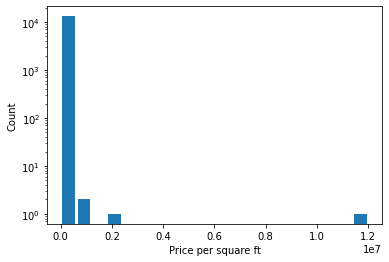

In [12]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

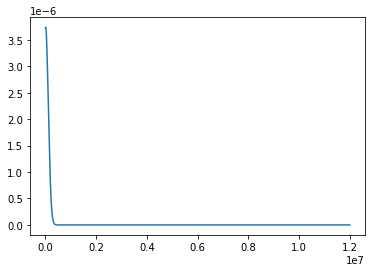

In [13]:
from scipy.stats import norm
rng = np.arange(df.price_per_sqft.min(), df.price_per_sqft.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.price_per_sqft.mean(),df.price_per_sqft.std()))

In [14]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [15]:
df[df.price_per_sqft > upper_limit]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3,74.0,3,672727
1005,other,1 BHK,15.0,1,30.0,1,200000
1106,other,5 Bedroom,24.0,2,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4,120.0,4,12000000
4924,other,7 BHK,5.0,7,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3,2250.0,4,76530
7012,other,1 BHK,650.0,1,500.0,1,76923
7575,other,1 BHK,425.0,1,750.0,1,176470
7799,other,4 BHK,2000.0,3,1063.0,4,53150


In [16]:
df[df.price_per_sqft < lower_limit]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3,130.0,3,371
798,other,4 Bedroom,10961.0,4,80.0,4,729
1867,other,3 Bedroom,52272.0,2,140.0,3,267
2392,other,4 Bedroom,2000.0,3,25.0,4,1250
3934,other,1 BHK,1500.0,1,19.5,1,1300
5343,other,9 BHK,42000.0,8,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3,175.0,3,875


In [17]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [18]:
Q1 = np.percentile(df.price_per_sqft, 1,
                   interpolation = 'midpoint')
Q1

2549.0

In [19]:
per = np.percentile(df['price_per_sqft'],0.001,interpolation = 'midpoint')
per

319.0

In [20]:
per = np.percentile(df['price_per_sqft'],0.999, interpolation = 'midpoint')
per

2549.0

In [21]:
Q1 = np.percentile(df.price_per_sqft, 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df.price_per_sqft, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

3050.0

In [22]:
upper = Q3 +1.5*IQR

lower = Q1 - 1.5*IQR

In [23]:
lower

-308.0

In [24]:
upper

11892.0

In [25]:
Q1 = np.percentile(df['price_per_sqft'], 0.001,
                   interpolation = 'midpoint')
Q1

319.0

In [26]:
Q2 = np.percentile(df['price_per_sqft'], 0.999,
                   interpolation = 'midpoint')
Q2

2549.0

In [27]:
df.shape

(13200, 7)

In [28]:
quartile1 = df['price_per_sqft'].quantile(0.001)
quartile3 = df['price_per_sqft'].quantile(0.999)

In [29]:
quartile1

1366.184

In [30]:
quartile3

50959.36200000098

In [31]:
df.price_per_sqft.quantile(0.001)

1366.184

In [32]:
df['price_per_sqft'].quantile(0.001)

1366.184

In [33]:
iqr = quartile3-quartile1

In [34]:
iqr

49593.17800000098

In [35]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [36]:
quartile1 = df.price_per_sqft.quantile(0.001)
quartile3 = df.price_per_sqft.quantile(0.999)

In [37]:
quartile1

1366.184

In [38]:
quartile3

50959.36200000098